# Learning from images 

In [9]:
from dlwpt.util.util import view_tensor

In [10]:
import torch

In [11]:
from matplotlib import pyplot as plt

In [12]:
from torchvision import datasets

In [13]:
from torchvision import transforms

In [14]:
from torchvision import datasets
data_path = '../data/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False) # <2>

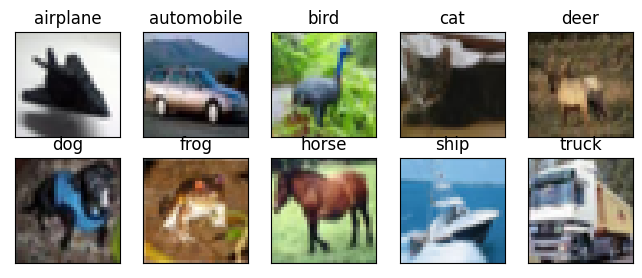

In [15]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [16]:
len(cifar10)

50000

In [17]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

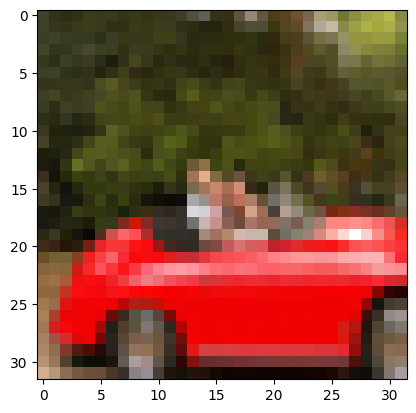

In [18]:
plt.imshow(img)

In [19]:
from torchvision import transforms

In [20]:
tensor_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False, 
    transform=transforms.ToTensor()
)

In [21]:
img_t, _ = tensor_cifar10[99]

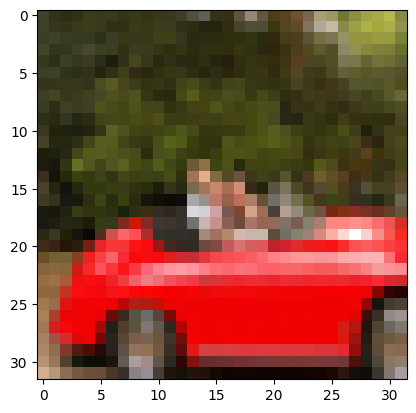

In [22]:
plt.imshow(img_t.permute(1,2,0)) # CxHxW -> HxWxC

In [23]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [24]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [25]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [26]:
cifar10_normalize = transforms.Normalize(imgs.mean(dim=[1,2,3]),imgs.std(dim=[1,2,3]))
cifar10_tensor_normalize = transforms.Compose([
        transforms.ToTensor(),
        cifar10_normalize
    ])

In [27]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False, 
    transform=cifar10_tensor_normalize
)
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False, 
    transform=cifar10_tensor_normalize
)

2022-12-23 21:26:49,435 WARNING  pid:3981 matplotlib.image:720:set_data Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


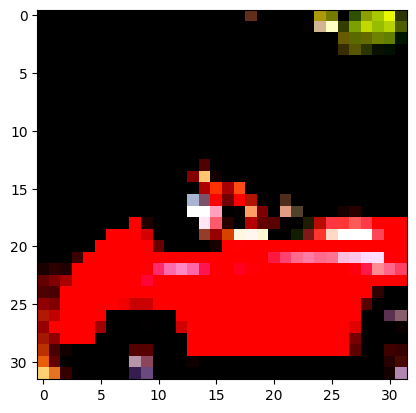

In [28]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [37]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val
              if label in [0, 2]]

In [30]:
import torch.nn as nn

n_out = len(class_names)

model = nn.Sequential(
            nn.Linear(
                3072,  # <1>
                512,   # <2>
            ),
            nn.Tanh(),
            nn.Linear(
                512,   # <2>
                n_out, # <3>
            )
        )

In [31]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [4, 5, 10]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0025, 0.0067, 0.9909]])

In [33]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

2022-12-23 21:37:46,234 WARNING  pid:3981 matplotlib.image:720:set_data Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


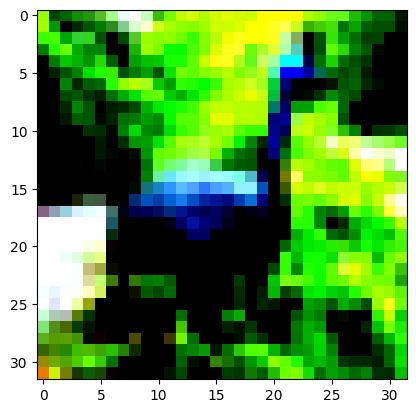

In [38]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [45]:
img.view(3,-1)

tensor([[ 0.6142, -0.3224, -0.1160,  ..., -0.4970, -0.5446, -0.0525],
        [ 1.3376,  0.2746,  0.4034,  ...,  0.1780,  0.1619,  0.7578],
        [-0.4477, -0.7925, -0.1929,  ..., -1.2723, -1.3172, -1.0474]])

In [48]:
img.view(1,3,-1)

tensor([[[ 0.6142, -0.3224, -0.1160,  ..., -0.4970, -0.5446, -0.0525],
         [ 1.3376,  0.2746,  0.4034,  ...,  0.1780,  0.1619,  0.7578],
         [-0.4477, -0.7925, -0.1929,  ..., -1.2723, -1.3172, -1.0474]]])

In [49]:
view_tensor(_48)

(torch.Size([1, 3, 1024]), (3072, 1024, 1))

In [47]:
view_tensor(_45)

(torch.Size([3, 1024]), (1024, 1))

In [50]:
img_batch = img.view(1, -1)

In [51]:
view_tensor(img_batch)

(torch.Size([1, 3072]), (3072, 1))

In [52]:
out = model(img_batch)
out

tensor([[0.5971, 0.4029]], grad_fn=<SoftmaxBackward0>)

In [53]:
torch.max(out, dim=1)

torch.return_types.max(
values=tensor([0.5971], grad_fn=<MaxBackward0>),
indices=tensor([0]))

In [54]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)) # take log of computed probabilities, in one step to keep it numerically stable

In [57]:
loss = nn.NLLLoss() # negative log-likelihood loss

In [59]:
img, label = cifar2[0]

out = model(img.view(1, -1))
loss(out, torch.tensor([label]))

tensor(1.1011, grad_fn=<NllLossBackward0>)

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 5.347057
Epoch: 1, Loss: 7.705317
Epoch: 2, Loss: 6.510838
Epoch: 3, Loss: 9.557189
Epoch: 4, Loss: 4.151933
Epoch: 5, Loss: 5.636873
Epoch: 6, Loss: 6.531207
Epoch: 7, Loss: 20.450516
Epoch: 8, Loss: 5.072948
Epoch: 9, Loss: 4.941860
Epoch: 10, Loss: 6.445535
Epoch: 11, Loss: 4.580799
Epoch: 12, Loss: 6.660308
Epoch: 13, Loss: 9.436373
Epoch: 14, Loss: 16.786476
Epoch: 15, Loss: 8.349138
Epoch: 16, Loss: 8.176860
Epoch: 17, Loss: 5.862664
Epoch: 18, Loss: 8.218906
Epoch: 19, Loss: 13.296558
Epoch: 20, Loss: 7.313433
Epoch: 21, Loss: 4.585245
Epoch: 22, Loss: 11.706884
Epoch: 23, Loss: 18.208710
Epoch: 24, Loss: 0.343157
Epoch: 25, Loss: 9.255491
Epoch: 26, Loss: 10.466807
Epoch: 27, Loss: 12.226366
Epoch: 28, Loss: 12.728527
Epoch: 29, Loss: 9.777843
Epoch: 30, Loss: 6.128856
Epoch: 31, Loss: 13.284330
Epoch: 32, Loss: 10.321814
Epoch: 33, Loss: 2.928349
Epoch: 34, Loss: 8.623670
Epoch: 35, Loss: 12.719531
Epoch: 36, Loss: 4.030444
Epoch: 37, Loss: 4.621825
Epoch: 38, 

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader: # imgs is a minibatch of 64 images x 3 x 32 x 32, labels is a tensor of 64 containing the label indices
        outputs = model(imgs.view(imgs.shape[0], -1)) # collapse into batch of 64 x 3072 (rest of dimensions)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.549068
Epoch: 1, Loss: 0.655492
Epoch: 2, Loss: 0.572815
Epoch: 3, Loss: 0.374827
Epoch: 4, Loss: 0.206992
Epoch: 5, Loss: 0.466093
Epoch: 6, Loss: 0.608441
Epoch: 7, Loss: 0.339524
Epoch: 8, Loss: 0.439891
Epoch: 9, Loss: 0.206705
Epoch: 10, Loss: 0.213129
Epoch: 11, Loss: 0.340803
Epoch: 12, Loss: 0.183124
Epoch: 13, Loss: 0.324924
Epoch: 14, Loss: 0.415997
Epoch: 15, Loss: 0.163785
Epoch: 16, Loss: 0.314192
Epoch: 17, Loss: 0.454478
Epoch: 18, Loss: 0.285490
Epoch: 19, Loss: 0.230613
Epoch: 20, Loss: 0.298829
Epoch: 21, Loss: 0.280964
Epoch: 22, Loss: 0.204198
Epoch: 23, Loss: 0.206980
Epoch: 24, Loss: 0.151830
Epoch: 25, Loss: 0.375905
Epoch: 26, Loss: 0.221690
Epoch: 27, Loss: 0.210639
Epoch: 28, Loss: 0.125292
Epoch: 29, Loss: 0.365497
Epoch: 30, Loss: 0.176741
Epoch: 31, Loss: 0.401978
Epoch: 32, Loss: 0.103670
Epoch: 33, Loss: 0.112942
Epoch: 34, Loss: 0.230794
Epoch: 35, Loss: 0.138924
Epoch: 36, Loss: 0.093156
Epoch: 37, Loss: 0.152997
Epoch: 38, Loss: 0.135

## Convolutions

In [70]:
conv = nn.Conv2d(
    3,
    16, # arbitrary
    kernel_size=3
                )

In [69]:
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))

In [74]:
conv.weight.shape # out_ch x in_ch x kernel_size (3, 3)

torch.Size([16, 3, 3, 3])

In [75]:
img, _ = cifar2[0]

output = conv(img.unsqueeze(0))

In [76]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

2022-12-23 22:30:49,989 WARNING  pid:3981 matplotlib.image:720:set_data Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


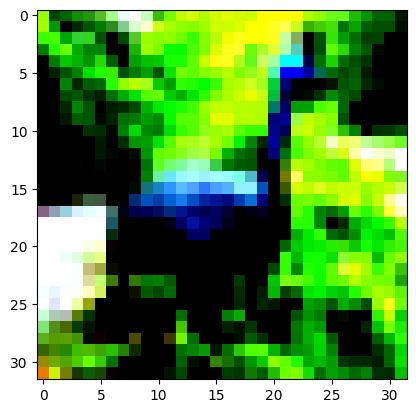

In [78]:
plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.show()

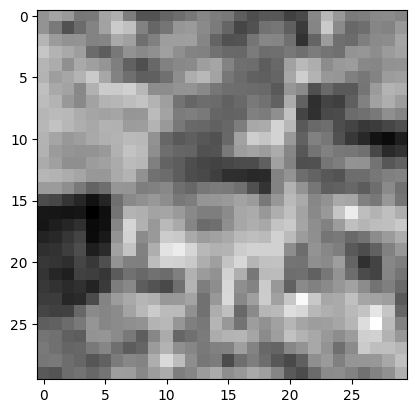

In [79]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [80]:
with torch.no_grad():
    conv.bias.zero_()

In [81]:
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

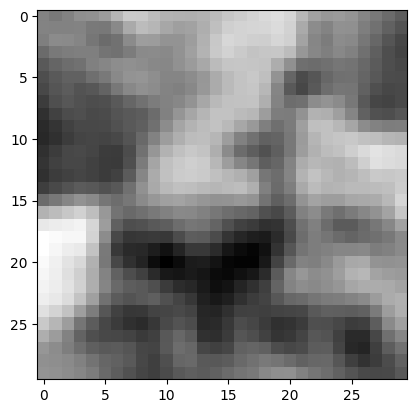

In [82]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [83]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [84]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0372, -0.1551]], grad_fn=<AddmmBackward0>)

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                           shuffle=True)

def validate(model, train_loader, val_loader):
    

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
model = Net()

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    loss_train = 0.0
    for imgs, labels in train_loader:
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss_train/len(train_loader)}")

Epoch 0, Loss: 0.6435417597460898
Epoch 10, Loss: 0.335574948009412
Epoch 20, Loss: 0.29692048963847434
Epoch 30, Loss: 0.2657136710206415
Epoch 40, Loss: 0.23970303015344463
Epoch 50, Loss: 0.2170063572324765
Epoch 60, Loss: 0.19821304780472615
Epoch 70, Loss: 0.17846754129240466
Epoch 80, Loss: 0.158433493606414
Epoch 90, Loss: 0.13845145056961447


In [89]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [94]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)  # <1>
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [95]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [96]:
device = "cpu"

In [100]:
import datetime

In [101]:
model = NetResDeep(n_chans1=32, n_blocks=10)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, val_loader)


2022-12-23 23:36:29.846177 Epoch 1, Training loss 0.48145080409991514
2022-12-24 01:40:32.015399 Epoch 10, Training loss 0.2457913639628963
2022-12-24 02:37:15.255280 Epoch 20, Training loss 0.1647168707790648
2022-12-24 02:40:21.070489 Epoch 30, Training loss 0.10479506366192155
2022-12-24 02:43:26.504165 Epoch 40, Training loss 0.0507660793543906
2022-12-24 02:46:23.335110 Epoch 50, Training loss 0.02601316308448459
2022-12-24 02:49:24.066298 Epoch 60, Training loss 0.011731745584743323
2022-12-24 02:52:25.459770 Epoch 70, Training loss 0.006852544124896644
2022-12-24 02:55:24.486064 Epoch 80, Training loss 0.018947532694122405
2022-12-24 02:58:28.178001 Epoch 90, Training loss 0.00850394399462944
2022-12-24 03:01:34.997385 Epoch 100, Training loss 0.005505163492456932


NameError: name 'validate' is not defined